# Séries Temporais

O objetivo deste notebook é explorar características importantes de uma série temporal, usando dados de transporte de passageiros de aerolinhas EEUU.

# Exploração de uma série temporal

In [1]:
# Importando bibliotecas
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime

from pandas.plotting import  register_matplotlib_converters
register_matplotlib_converters()



In [2]:
# Carregamento da base de dados
# =============================================================================
base = pd.read_csv("AirPassengers.csv")

In [3]:
# Info dos dados
# ==============================================================================
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
# Informação dos dados
# ==============================================================================
print(base.dtypes)

Month          object
#Passengers     int64
dtype: object


In [5]:
# Conversao dos atributos que estão no formato string para o formato data : ANO-MÊS
#===============================================================================
dateparse = lambda dates: datetime.strptime(dates, "%Y-%m")
base = pd.read_csv("AirPassengers.csv", parse_dates= ["Month"],
               index_col= "Month", date_parser = dateparse)
base.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
# Visualização do índice do dataframe
# ==============================================================================
base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [7]:
# Criando uma variável chamada de ts
# ==============================================================================
ts = base["#Passengers"]
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [8]:
# Visualização de registro específico
# ==============================================================================
ts[1]

118

In [9]:
#visualização por ano e mês
# ==============================================================================
ts["1949-02"]

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [10]:
# Visualização com uma data específica
# ==============================================================================
ts[datetime(1949,2,1)]

118

In [11]:
# Visualização  intervalos
# ==============================================================================
ts["1950-01-01": "1950-08-31"]

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
Name: #Passengers, dtype: int64

In [12]:
# Visualização de invervalos sem preencher a data de início
# ==============================================================================
ts[:'1950-07-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [13]:
# Visualização por ano
# ==============================================================================
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [14]:
# Valores máximos
# ==============================================================================
ts.index.max()

Timestamp('1960-12-01 00:00:00')

In [15]:
# Valores mínimos
# ==============================================================================
ts.index.min()

Timestamp('1949-01-01 00:00:00')

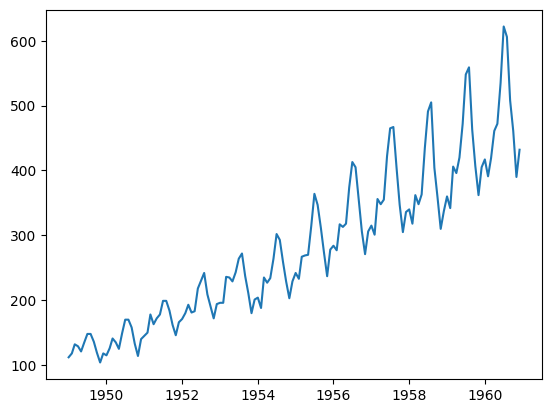

In [16]:
# Visualização da série temporal
# ==============================================================================
plt.plot(ts)

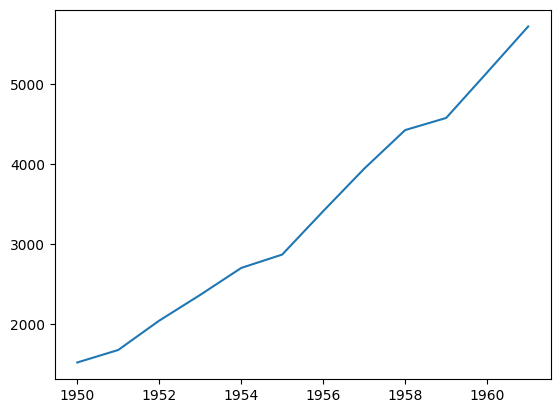

In [17]:
# Visualização por ano
# ==============================================================================
ts_ano= ts.resample("A").sum()
plt.plot(ts_ano)

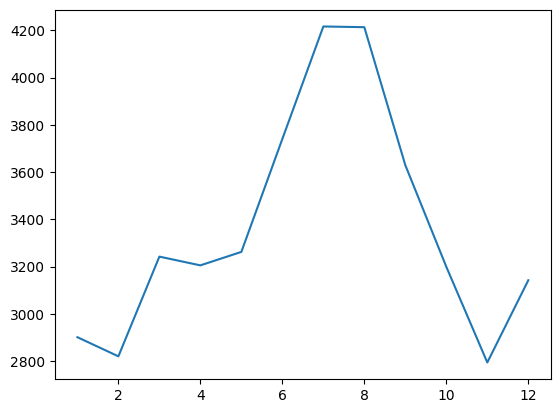

In [18]:
# Vizualização por mês
# ==============================================================================
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

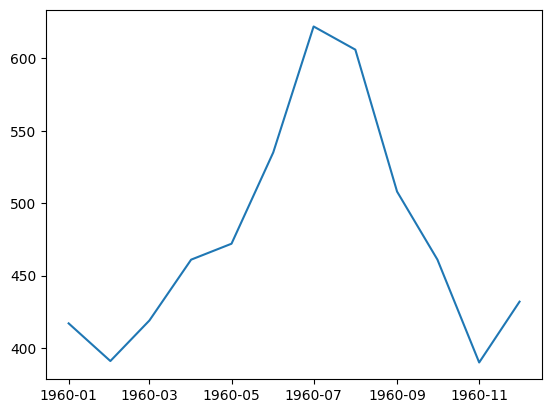

In [19]:
# Visualização entre datas específicas
# ==============================================================================
ts_datas = ts["1960-01-01" : "1960-12-01"]
ts_datas
plt.plot(ts_datas)

# Decomposição

 Quando uma série temporal apresenta elementos como tendência, sazonalidade e ruido, a série temporal pode se decompor em esses 3 elementos.
\begin{equation}
\text{Dados original : Transporte de passajeros}
\left\{\begin{matrix}
\text{Tendência} \\
\text{Sazonalidade}\\
\text{Ruido}
\end{matrix}\right.
\end{equation}

In [20]:
# Importando bibliotecas
# ==============================================================================
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:
# Decomposição da série temporal, criando uma variável para cada formato
# ==============================================================================
decompose = seasonal_decompose(ts)


In [22]:
# Tendência
# ==============================================================================
tendencia = decompose.trend
tendencia

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [23]:
# Sazonalidade
# ==============================================================================
sazonal = decompose.seasonal
sazonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [24]:
# Ruido
# ==============================================================================
aleatorio = decompose.resid
aleatorio

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

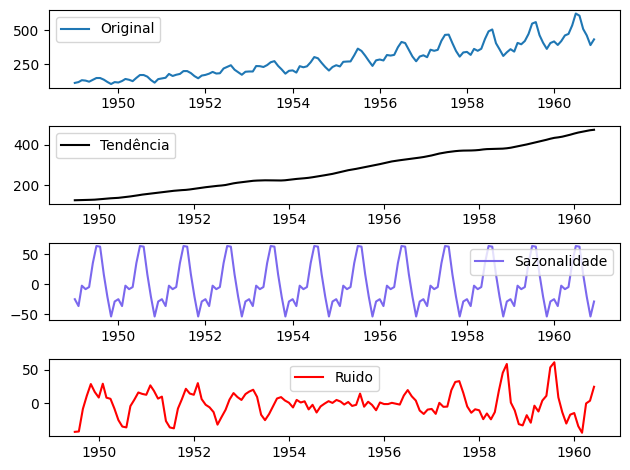

In [25]:
# Visualização do gráfico original e a decomposição
# ==============================================================================
plt.subplot(4,1,1)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')

# Visualização somente da tendência
# ==============================================================================
plt.subplot(4,1,2)
plt.plot(tendencia, label = 'Tendência', color = 'black')
plt.legend(loc = 'best')


# Visualização somente da sazonalidade
# ==============================================================================
plt.subplot(4,1,3)
plt.plot(sazonal, label = 'Sazonalidade', color = 'mediumslateblue')
plt.legend(loc = 'best')

# Visualização somente do elemento aleatório
# ==============================================================================
plt.subplot(4,1,4)
plt.plot(aleatorio, label = 'Ruido', color ='red')
plt.legend(loc = 'best')
plt.tight_layout()

**Reporte**

*  Podemos visualizar do gráfico anterior que os elementos de tendencia, sazonalidade e ruido ficam mais claro  depois de fazer a decomposicao.
* Do gráfico de sazonalidade claramente podemos visualizar uma regularidade uniforme.
* Do gráfico de tendencia podemos visualizar uma linha reta bem definida.
* O último gráfico é o gráfico de ruido

# Previsoes com Arima

## Encontrando os melhores parametros

In [29]:
# Instalando pmdarima
# ==============================================================================
!pip install pmdarima

In [30]:
# Importando bliblioteca
# ==============================================================================
from pmdarima.arima import auto_arima


In [31]:
# Aplicando o autoarima para buscar os melhores parametros p,d e q
# ordem da parte regressiva,  grau de diferenciacao e a ordem da média movil
# ==============================================================================
stepwise_model = auto_arima(base, start_p=1,start_q=1,start_d= 0, start_P=0, max_p=6, max_q=6, m=12, seasonal=True, trace=True, stepwise=False)

''' start_p , start_q start_d informando os valores inicias , parametro opcionais
    start P ordem da parte seasonal porque nossa serie tem um elemento seasonal
    max_p = 6
    m = 12 ->dados mensais
    seasonal = True -> pq nossa série temporal apresenta um efeito seasonal
    stepwise = False -> testa todas as combinacoes dos parametros
    AIC  -> é uma métrica que evalue o quanto o modelo é bom e o objetivo é encontrar
            o menor valor de AIC. '''

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.09 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.15 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.62 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.15 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.30 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=0.96 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.37 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=5.56 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=5.76 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.47 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=1.54 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.77 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=2.03 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=4.61 sec
 ARIM

' start_p , start_q start_d informando os valores inicias , parametro opcionais\n    start P ordem da parte seasonal porque nossa serie tem um elemento seasonal\n    max_p = 6\n    m = 12 ->dados mensais\n    seasonal = True -> pq nossa série temporal apresenta um efeito seasonal\n    stepwise = False -> testa todas as combinacoes dos parametros\n    AIC  -> é uma métrica que evalue o quanto o modelo é bom e o objetivo é encontrar\n            o menor valor de AIC. '

In [32]:
# Visualizando o melhor AIC para a combinação ARIMA(0,1,1)(1,1,2)[12]
# ==============================================================================
print(stepwise_model.aic())

1012.9907964895799


In [33]:
# Separando  os dados em treino e teste
# ==============================================================================
train = base.loc['1949-01-01':'1959-12-01']
test = base.loc['1960-01-01':]

 ## Construindo nosso modelo preditivo

In [34]:
# Treinando o modelo
# ==============================================================================
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [35]:
# Previsão
# ==============================================================================
future_forecast = stepwise_model.predict(n_periods=12)
future_forecast

1960-01-01    420.248524
1960-02-01    398.467270
1960-03-01    461.924955
1960-04-01    450.705407
1960-05-01    474.027678
1960-06-01    537.927076
1960-07-01    612.254751
1960-08-01    623.611980
1960-09-01    520.187427
1960-10-01    462.338878
1960-11-01    412.953715
1960-12-01    453.780372
Freq: MS, dtype: float64

In [36]:
# Comparando os valores reais com as previsões
# ==============================================================================
future_forecast = pd.DataFrame(future_forecast, index=test.index, columns = ['#Passangers'])
future_forecast

,#Passangers
Month,
1960-01-01,420.248524
1960-02-01,398.467270
1960-03-01,461.924955
1960-04-01,450.705407
1960-05-01,474.027678
1960-06-01,537.927076
1960-07-01,612.254751
1960-08-01,623.611980
1960-09-01,520.187427


Text(0.5, 1.0, 'Comparação do valor real e a previsão')

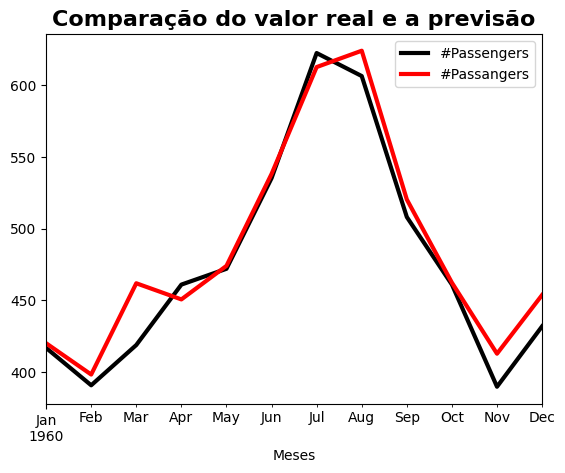

In [38]:
# Visualizando  as comparações
# ==============================================================================
pd.concat([test,future_forecast],axis=1).plot(linewidth=3, color =['black','red'])
plt.xlabel('Meses')
plt.title('Comparação do valor real e a previsão', weight= 'bold', size = 16 )

Text(0.5, 1.0, 'Previsão do Modelo')

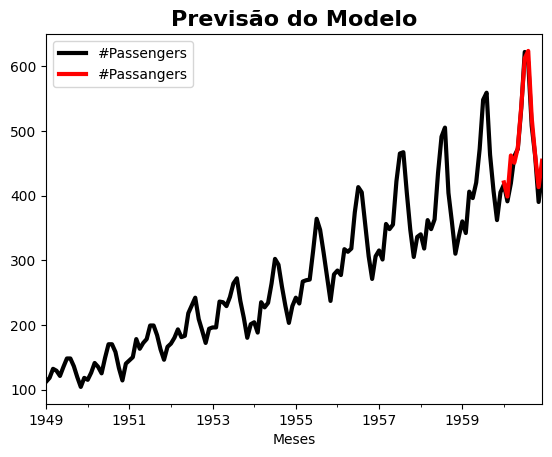

In [39]:
# Gráfica completa
# ==============================================================================
pd.concat([base,future_forecast],axis=1).plot(linewidth =3, color= ['black','red'])
plt.xlabel('Meses')
plt.title('Previsão do Modelo', weight= 'bold', size = 16 )

# Reporte Final


* **O melhor modelo é alcançado com a combinação: ARIMA(0,1,1)(1,1,2)[12], com um AIC de 1012.99.**
* **Usando essa combinação de AIC construimos nosso modelo preditivo.**
* **Para a construção de nosso modelo separamos nossos dados em dois partes treino e teste.**
     *  **Dados de treino com intervalo desde 1949 até 1959.**
     *  **Dados de teste, só ano 1960, 12 meses.**
* **O último gráfico é bom indicador de que nosso modelo está predizendo razoavelmente bem.**



# Referências

*   *Forecasting : Principles and Practice*, Rob J. Hyndman and George Athanasopoulos, Second edition, **(2018)**